## import the required libraries

In [1]:
import albumentations as A
import cv2
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from collections import Counter
#l = image.flatten().tolist()
#Counter(l)

## Tools

In [3]:
def show_sample(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(15, 12))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(15, 12))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

## define an augmentation pipeline

In [9]:
crop = A.Compose([
    A.RandomCrop(width=128, height=128),
])

In [10]:
vflip = A.Compose([
    A.VerticalFlip(p=1)
])

In [11]:
hflip = A.Compose([
    A.HorizontalFlip(p=1),
])

In [12]:
rotate = A.Compose([             
    A.RandomRotate90(p=1)
])

In [13]:
shift = A.Compose([
    A.ShiftScaleRotate(p=1),
])

In [14]:
pad = A.PadIfNeeded(min_height=156, min_width=156, p=1)


In [15]:
transpose = A.Transpose(p=1)

In [16]:
brightness = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),
])

## Read images and masks from the disk

In [17]:
df = pd.DataFrame()
images = []
masks = []
for dirname, _, filenames in os.walk('final images'):
    for filename in filenames:
        images.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('final masks'):
    for filename in filenames:
        masks.append(os.path.join(dirname, filename))
        
df.insert(0, 'image_path', images)
df.insert(1, 'mask_path', masks)

In [18]:
df

,image_path,mask_path
0,final images\1.PNG,final masks\1.PNG
1,final images\3.PNG,final masks\3.PNG
2,final images\4.PNG,final masks\4.PNG
3,final images\5.PNG,final masks\5.PNG
4,final images\6.PNG,final masks\6.PNG
5,final images\ElSellaE1-Zircon+Thorite+xenotime...,final masks\ElSellaE1-Zircon+Thorite+xenotime.png
6,final images\ElSellaE5+zircon+Thorit+Xenotime.png,final masks\ElSellaE5+zircon+Thorit+Xenotime.png
7,final images\ElSellaE6 monazite +Thorite in zi...,final masks\ElSellaE6 monazite +Thorite in zir...
8,final images\ElSellaYNbOxide+Col+Monazite+Zirc...,final masks\ElSellaYNbOxide+Col+Monazite+Zirco...
9,final images\ES11+Zircon+Thorite.png,final masks\ES11+Zircon+Thorite.png


## Pass images and masks to the augmentation pipeline and save augmented images and masks

Testing the augmentation method

In [19]:
image = cv2.imread(df.iloc[5][0])
mask = cv2.imread(df.iloc[5][1])

In [20]:
Counter(mask.flatten().tolist())

Counter({0: 2088807, 255: 203193})

In [21]:
transformed = crop(image=image, mask=mask)
transformed_image = transformed['image']
transformed_mask = transformed['mask']

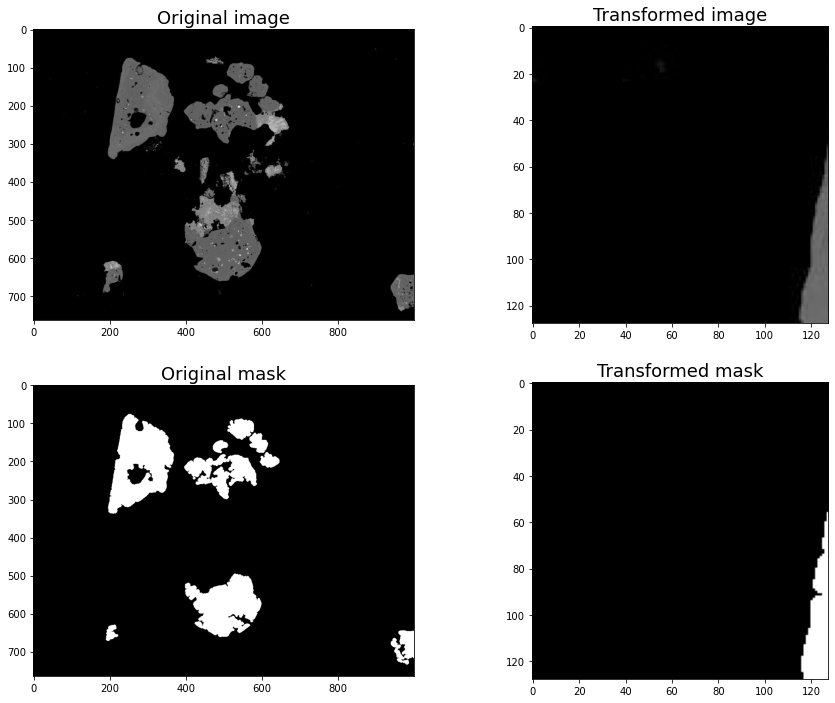

In [22]:
show_sample( transformed_image, transformed_mask, image, mask )

  virtical flip

In [23]:
transformed = vflip(image=transformed_image, mask=transformed_mask)
transformed_image_ = transformed['image']
transformed_mask_ = transformed['mask']

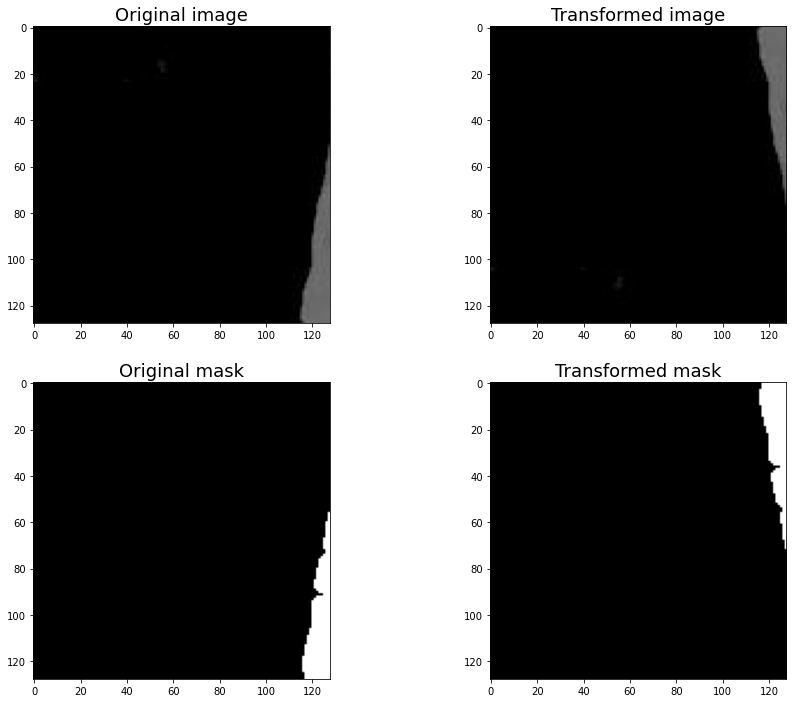

In [24]:
show_sample( transformed_image_, transformed_mask_, transformed_image, transformed_mask )

horizontal flip

In [25]:
transformed = hflip(image=transformed_image, mask=transformed_mask)
transformed_image_ = transformed['image']
transformed_mask_ = transformed['mask']

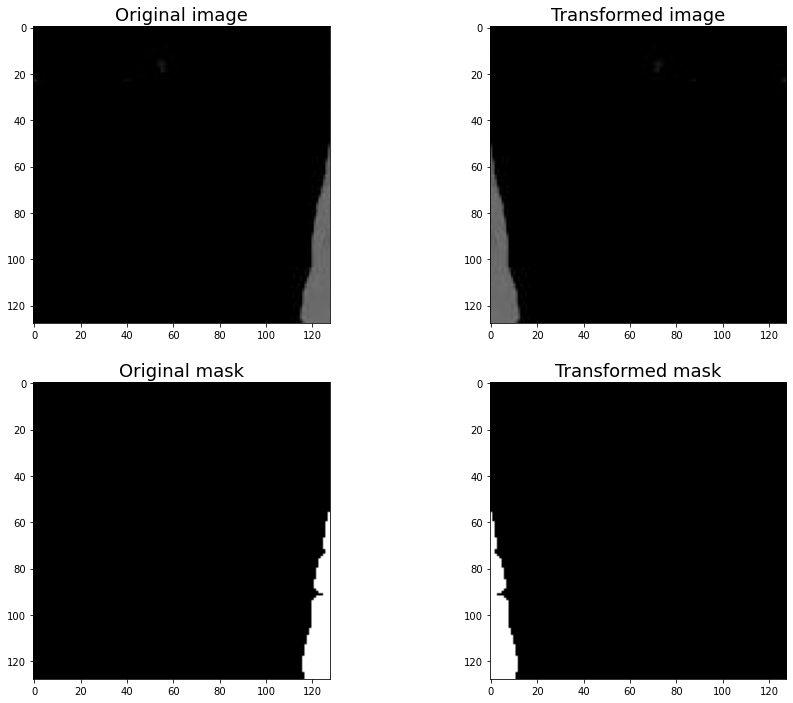

In [26]:
show_sample( transformed_image_, transformed_mask_, transformed_image, transformed_mask )

shiftrotate

In [27]:
transformed = rotate(image=transformed_image, mask=transformed_mask)
transformed_image_ = transformed['image']
transformed_mask_ = transformed['mask']

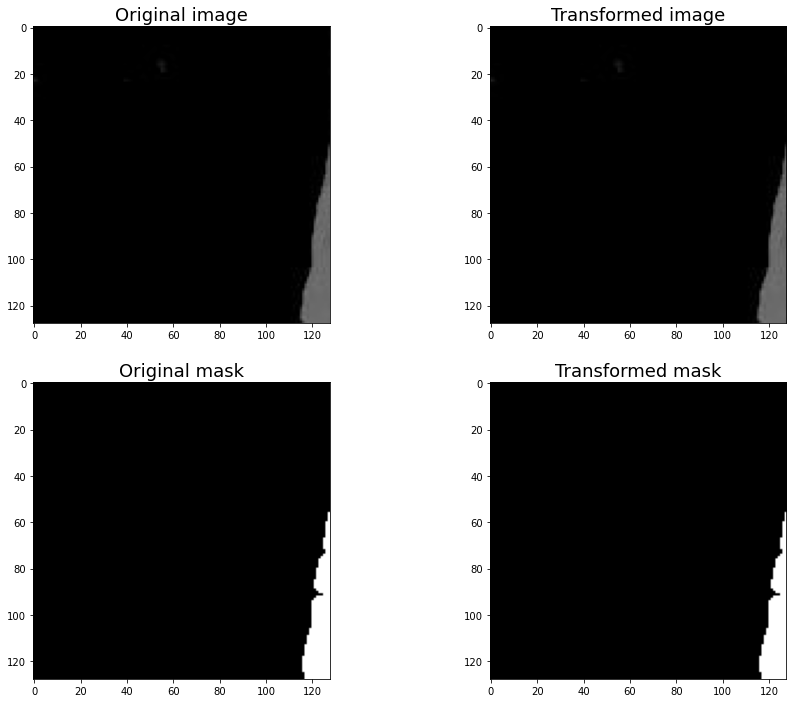

In [28]:
show_sample( transformed_image_, transformed_mask_, transformed_image, transformed_mask )

In [29]:
transformed = shift(image=transformed_image, mask=transformed_mask)
transformed_image_ = transformed['image']
transformed_mask_ = transformed['mask']

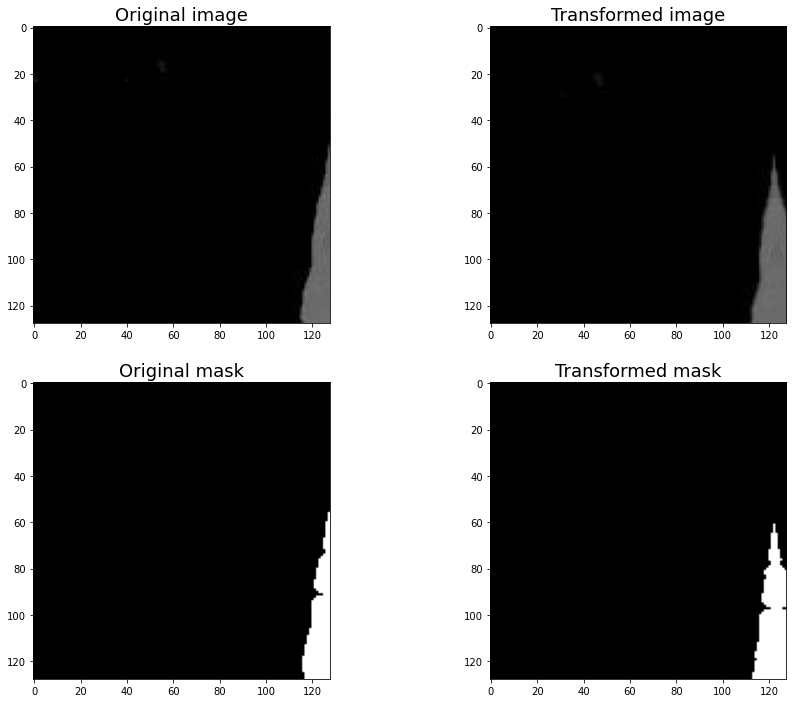

In [30]:
show_sample( transformed_image_, transformed_mask_, transformed_image, transformed_mask )

padding

In [31]:
transformed = pad(image=transformed_image, mask=transformed_mask)
transformed_image_ = transformed['image']
transformed_mask_ = transformed['mask']

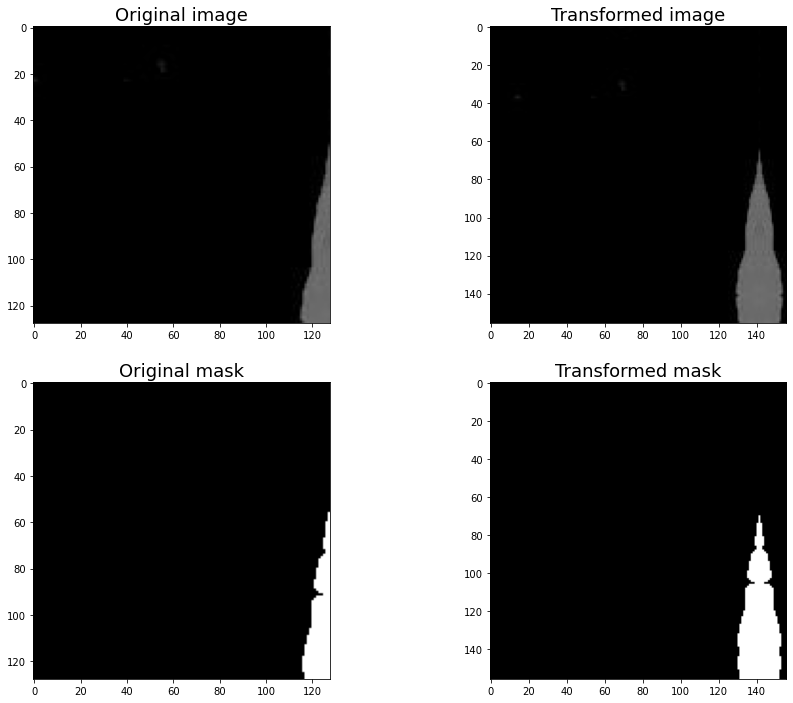

In [32]:
show_sample( transformed_image_, transformed_mask_, transformed_image, transformed_mask )

## creating 30 augmented sample of each image using crop method


In [39]:
df.iloc[30][0][13:-4]

'ZMF2Z1 Col in Zircon'

In [36]:
%%time
#iterate through each image path and its mask then random crop 50 new images and masks
for index in tqdm(df.index):
    image = cv2.imread(df.iloc[index][0])
    mask = cv2.imread(df.iloc[index][1])
    image_name = df.iloc[index][0][13:-4]
    #to randomly crop 30 samples from the image
    for i in range(30):
        transformed = crop(image=image, mask=mask)
        transformed_image = transformed['image']
        transformed_mask = transformed['mask']
        #check for labels distribution in mask before saving
        mask_flat = transformed_mask.reshape((-1, 1))
        mask_flat_ = np.array(mask_flat).squeeze().tolist()
        #if  40<= mask_flat_.count(255)/ len(mask_flat)*100 <=60:
            # saving augmented samples
        cv2.imwrite(os.path.join('final samples results/crop/images/', f'{image_name}_case_{i+1}.png'), transformed_image)
        cv2.imwrite(os.path.join('final samples results/crop/masks/', f'{image_name}_case_{i+1}.png'), transformed_mask)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:07<00:00,  5.65it/s]

Wall time: 7.79 s


### adding the original data

In [40]:
for dirname, _, filenames in os.walk('final images'):
    for filename in filenames:
            image = cv2.imread(os.path.join(dirname, filename))
            #saving image
            cv2.imwrite(os.path.join('final samples results/crop/images/', f'{filename}'), image)

for dirname, _, filenames in os.walk('final masks'):
    for filename in filenames:
            mask = cv2.imread(os.path.join(dirname, filename))
            #saving image
            cv2.imwrite(os.path.join('final samples results/crop/masks/', f'{filename}'), mask)

In [41]:
df_crop = pd.DataFrame()
images = []
masks = []
for dirname, _, filenames in os.walk('final samples results/crop/images'):
    for filename in filenames:
        images.append(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('final samples results/crop/masks'):
    for filename in filenames:
        masks.append(os.path.join(dirname, filename))
        
df_crop.insert(0, 'image_path', images)
df_crop.insert(1, 'mask_path', masks)

In [42]:
df_crop

,image_path,mask_path
0,final samples results/crop/images\1.PNG,final samples results/crop/masks\1.PNG
1,final samples results/crop/images\1_case_1.png,final samples results/crop/masks\1_case_1.png
2,final samples results/crop/images\1_case_10.png,final samples results/crop/masks\1_case_10.png
3,final samples results/crop/images\1_case_11.png,final samples results/crop/masks\1_case_11.png
4,final samples results/crop/images\1_case_12.png,final samples results/crop/masks\1_case_12.png
...,...,...
1359,final samples results/crop/images\Zr+urano+Xen...,final samples results/crop/masks\Zr+urano+Xen_...
1360,final samples results/crop/images\Zr+urano+Xen...,final samples results/crop/masks\Zr+urano+Xen_...
1361,final samples results/crop/images\Zr+urano+Xen...,final samples results/crop/masks\Zr+urano+Xen_...
1362,final samples results/crop/images\Zr+urano+Xen...,final samples results/crop/masks\Zr+urano+Xen_...


### applying augmentation methods on croped data

#### apply vertical flip and transpose on 450 images

In [47]:
df_crop.iloc[0][0][34:-4]

'1'

In [48]:
for index in tqdm(df_crop.index[::4]):
    #select image and mask
    image = cv2.imread(df_crop.iloc[index][0])
    mask = cv2.imread(df_crop.iloc[index][1])
    image_name = df_crop.iloc[index][0][34:-4]
    #apply vflip method
    transformed = vflip(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    #save transformed image and mask
    cv2.imwrite(os.path.join('final samples results/vflip/images/', f'{image_name}_vflip.png'), transformed_image)
    cv2.imwrite(os.path.join('final samples results/vflip/masks/', f'{image_name}_vflip.png'), transformed_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 341/341 [00:02<00:00, 127.63it/s]


### apply horizontal flip on the next 200 images

In [49]:
for index in tqdm(df_crop.index[::3]):
    #select image and mask
    image = cv2.imread(df_crop.iloc[index][0])
    mask = cv2.imread(df_crop.iloc[index][1])
    image_name = df_crop.iloc[index][0][34:-4]
    #apply hflip method
    transformed = hflip(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    #save transformed image and mask
    cv2.imwrite(os.path.join('final samples results/hflip/images/', f'{image_name}_hflip.png'), transformed_image)
    cv2.imwrite(os.path.join('final samples results/hflip/masks/', f'{image_name}_hflip.png'), transformed_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 455/455 [00:03<00:00, 126.45it/s]


### apply rotation on the rest of images

In [50]:
for index in tqdm(df_crop.index[1::2]):
    #select image and mask
    image = cv2.imread(df_crop.iloc[index][0])
    mask = cv2.imread(df_crop.iloc[index][1])
    image_name = df_crop.iloc[index][0][34:-4]
    #apply rotate method
    transformed = rotate(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    #save transformed image and mask
    cv2.imwrite(os.path.join('final samples results/rotate/images/', f'{image_name}_rotate.png'), transformed_image)
    cv2.imwrite(os.path.join('final samples results/rotate/masks/', f'{image_name}_rotate.png'), transformed_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 682/682 [00:05<00:00, 114.23it/s]


### apply shiftscalerotate on 731 images

In [51]:
for index in tqdm(df_crop.index[1::2]):
    #select image and mask
    image = cv2.imread(df_crop.iloc[index][0])
    mask = cv2.imread(df_crop.iloc[index][1])
    image_name = df_crop.iloc[index][0][34:-4]
    #apply shift method
    transformed = shift(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    #save transformed image and mask
    cv2.imwrite(os.path.join('final samples results/shift/images/', f'{image_name}_shift.png'), transformed_image)
    cv2.imwrite(os.path.join('final samples results/shift/masks/', f'{image_name}_shift.png'), transformed_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 682/682 [00:05<00:00, 114.79it/s]


### apply padding to 300 images

In [52]:
for index in tqdm(df_crop.index[::2]):
    #select image and mask
    image = cv2.imread(df_crop.iloc[index][0])
    mask = cv2.imread(df_crop.iloc[index][1])
    image_name = df_crop.iloc[index][0][34:-4]
    #apply pad method
    transformed = pad(image=image, mask=mask)
    transformed_image = transformed['image']
    transformed_mask = transformed['mask']
    #save transformed image and mask
    cv2.imwrite(os.path.join('final samples results/pad/images/', f'{image_name}_pad.png'), transformed_image)
    cv2.imwrite(os.path.join('final samples results/pad/masks/', f'{image_name}_pad.png'), transformed_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 682/682 [00:06<00:00, 103.63it/s]


### blurring

In [53]:
for index in tqdm(df_crop.index[1::4]):
    #select image and mask
    image = cv2.imread(df_crop.iloc[index][0])
    mask = cv2.imread(df_crop.iloc[index][1])
    image_name = df_crop.iloc[index][0][34:-4]
    #apply blurring
    transformed_image = cv2.blur(image, (10, 10))
    transformed_mask = mask
    #save transformed image and mask
    cv2.imwrite(os.path.join('final samples results/blur/images/', f'{image_name}_blur.png'), transformed_image)
    cv2.imwrite(os.path.join('final samples results/blur/masks/', f'{image_name}_blur.png'), transformed_mask)

100%|███████████████████████████████████████████████████████████████████████████████| 341/341 [00:03<00:00, 109.06it/s]


### concatinating all augmented data and original data

In [57]:
all_data  

,image_path
0,final samples results\all images\1.PNG
1,final samples results\all images\1_case_1.png
2,final samples results\all images\1_case_10.png
3,final samples results\all images\1_case_10_pad...
4,final samples results\all images\1_case_11.png
...,...
9089,final samples results\vflip\images\Zr+urano+Xe...
9090,final samples results\vflip\images\Zr+urano+Xe...
9091,final samples results\vflip\images\Zr+urano+Xe...
9092,final samples results\vflip\images\Zr+urano+Xe...
